In [1]:
from stock_info import StockInfo
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### This function outputs all the days in a stocks history that its p-value was below a certain threshold

In [2]:
# stock is a custom StockInfo object
# p_value = maximum value that we want the p-value to be in order to trigger a buy
# scope = the number of days that we look in the past to test the p-value
def points_of_entry(stock, p_value = 0.05, scope = 252):

    # Check if the dataframe has too little data
    if len(stock.data) < scope:
        raise ValueError(f"Not enough Data, DataFrame has less than {scope} rows")
    # Iterate over every stock price, check the p-value based on the previous 'scope' days of trading and if the returned p-value 
    # is less than the desired one, return the purchase date

    results = {}

    for i in range(scope, len(stock.data)):
        window_data = stock.data.iloc[i - scope : i]
        adf_result = adfuller(window_data.iloc[:,0])
        #print(adf_result[1])

        if adf_result[1] <= p_value:
            results[window_data.index[-1]] = adf_result[1]

    #print(results)
    return results
    

In [47]:
stock = StockInfo('DASH', start = '2010-01-01', end = '2014-01-01')
stock.data

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DASH']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1388552400")


,DASH
Date,


C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

BTI [229, 149, 271, 175, 236, 187, 243, 199, 267, 193, 231, 186, 222, 175, 218, 171, 211, 161, 179, 148, 115, 88, 100, 91, 92, 80, 80, 72, 90, 95, 88, 89, 93, 91, 94, 92, 89, 81, 82, 91, 91, 88, 94, 89, 87, 88, 87, 78, 75, 70, 66, 64, 70, 65, 69, 72, 80, 90, 89, 94, 93, 89, 96, 98, 99, 95, 97, 99, 102, 103, 105, 108, 101, 104, 106, 115, 111, 114, 107, 107, 109, 110, 110, 108, 110, 118, 120, 126, 125, 125, 128, 129, 125, 124, 127, 135, 132, 134, 131, 130, 138, 138, 136, 143, 132, 130, 127, 127, 124, 127, 133, 135, 138, 135, 136, 137, 138, 140, 135, 133, 137, 134, 132, 131, 127, 123, 119, 119, 109, 111, 113, 118, 118, 114, 117, 116, 116, 117, 115, 116, 118, 117, 112, 110, 106, 103, 100, 96, 96, 91, 89, 83, 83, 80, 77, 74, 70, 62, 60, 61, 54, 52, 53, 54, 56, 58, 59, 58, 58, 56, 56, 56, 53, 50, 50, 47, 48, 46, 45, 44, 38, 35, 32, 29, 29, 31, 30, 31, 29, 30, 32, 29, 26, 27, 23, 23, 25, 25, 23, 23, 23, 20, 19, 20, 19, 16, 16, 15, 14, 12, 13, 12, 13, 13, 13, 14, 16, 13, 12, 11, 10, 10, 10, 12


C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

MCO [225, 168, 271, 219, 281, 227, 285, 225, 236, 177, 261, 220, 227, 169, 229, 187, 209, 163, 220, 181, 152, 152, 145, 127, 127, 134, 125, 115, 115, 101, 92, 88, 81, 82, 81, 71, 72, 68, 68, 71, 70, 70, 67, 63, 59, 59, 63, 56, 64, 67, 61, 61, 54, 53, 50, 46, 45, 40, 38, 33, 28, 27, 22, 22, 22, 21, 21, 21, 16, 14, 14, 11, 11, 11, 9, 12, 11, 12, 13, 15, 14, 14, 18, 15, 13, 13, 14, 14, 14, 10, 11, 10, 9, 8, 10, 9, 11, 10, 10, 9, 10, 8, 7, 6, 8, 6, 7, 6, 6, 7, 6, 4, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 1, 2, 1, 1, 1, 1, 1, 2, 4, 3, 3, 4, 3, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

HMC [205, 151, 300, 225, 275, 192, 257, 180, 220, 172, 244, 192, 240, 192, 213, 171, 220, 168, 201, 165, 151, 134, 139, 131, 129, 118, 117, 105, 111, 102, 90, 97, 91, 86, 78, 79, 88, 74, 71, 75, 70, 75, 76, 80, 73, 70, 65, 69, 68, 69, 71, 65, 65, 68, 66, 67, 62, 70, 71, 74, 71, 67, 76, 79, 83, 93, 95, 91, 95, 93, 89, 88, 93, 87, 91, 96, 96, 93, 90, 93, 93, 96, 97, 101, 93, 96, 83, 78, 76, 71, 79, 79, 82, 78, 84, 86, 80, 75, 74, 75, 73, 73, 71, 67, 70, 74, 73, 70, 68, 66, 70, 75, 69, 65, 67, 66, 69, 69, 66, 61, 64, 64, 58, 62, 62, 56, 55, 50, 50, 51, 50, 47, 49, 48, 42, 45, 43, 42, 42, 43, 42, 38, 37, 40, 45, 43, 46, 45, 48, 47, 49, 47, 45, 44, 46, 42, 45, 45, 46, 47, 46, 50, 50, 49, 47, 44, 44, 41, 42, 39, 39, 38, 40, 40, 41, 42, 43, 46, 45, 44, 47, 47, 49, 47, 45, 43, 41, 43, 41, 39, 39, 39, 36, 36, 36, 36, 36, 35, 34, 32, 33, 32, 29, 31, 31, 31, 29, 29, 30, 33, 34, 36, 34, 33, 33, 34, 34, 32, 33, 32, 31, 30, 29, 28, 28, 26, 27, 26, 27, 26, 26, 26, 24, 24, 23, 23, 22, 22, 22, 22, 19, 

F [220, 157, 297, 214, 248, 185, 256, 193, 255, 214, 240, 197, 255, 204, 247, 208, 219, 202, 249, 207, 187, 178, 161, 142, 152, 150, 153, 146, 148, 138, 144, 141, 133, 136, 129, 126, 124, 106, 96, 93, 93, 88, 84, 89, 87, 80, 75, 72, 68, 62, 62, 61, 59, 56, 52, 48, 52, 55, 59, 51, 50, 46, 48, 48, 49, 47, 49, 51, 47, 47, 49, 52, 52, 46, 49, 45, 45, 40, 38, 39, 41, 41, 43, 42, 38, 38, 38, 39, 37, 37, 40, 36, 35, 34, 38, 38, 34, 32, 31, 32, 31, 30, 29, 27, 27, 29, 29, 28, 31, 30, 31, 27, 26, 25, 27, 24, 24, 21, 21, 20, 19, 16, 15, 14, 13, 13, 15, 9, 4, 5, 8, 7, 8, 8, 7, 6, 6, 6, 7, 9, 7, 6, 8, 7, 6, 7, 6, 5, 5, 4, 3, 2, 4, 3, 2, 4, 4, 3, 3, 4, 5, 5, 5, 4, 4, 5, 3, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]


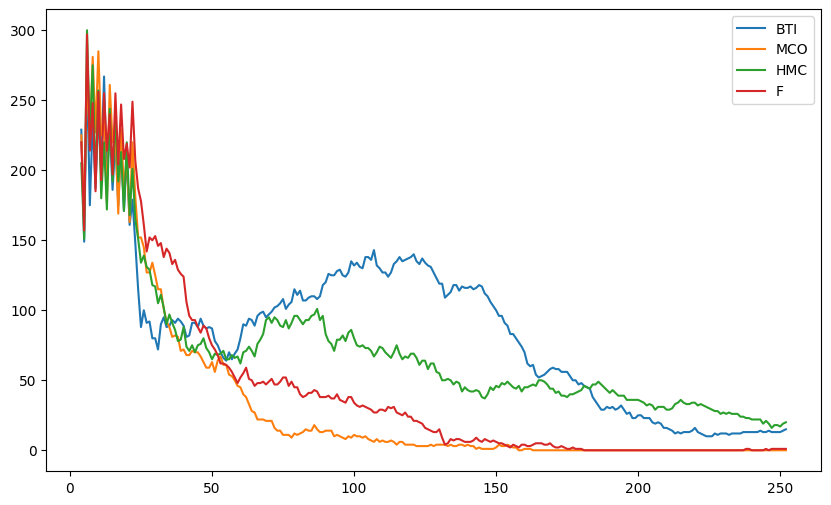

In [51]:
plt.figure(figsize=(10,6))
tickers = ['BTI','MCO','HMC','F']
n = 253 # Maximum scope = 253
scope_list = []
for ticker in tickers:
    stock = StockInfo(ticker, start = '2010-01-01', end = '2014-01-01')
    entry_points_list = []
    for i in range(4,n):
        #print(i)
        entry_points_list.append( len(points_of_entry(stock, p_value = 0.05, scope = i)) )
        if len(scope_list) < len(entry_points_list):
            scope_list.append(i)
    print(ticker, entry_points_list)
    plt.plot(scope_list, entry_points_list, label=f'{ticker}')
    plt.legend()

### Results below for number of entry points plotted against scope or window:

In [10]:
full_scope_list = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,252]

In [29]:
dict_of_data = {
    'AA' : [187, 135, 309, 212, 230, 181, 269, 198, 269, 210, 237, 185, 236, 187, 250, 184, 203, 183, 229, 171, 148, 145, 134, 133, 121, 109, 108, 105, 105, 100, 90, 96, 95, 94, 90, 82, 85, 83, 77, 74, 71, 66, 59, 56, 52, 54, 53, 56, 47, 46, 49, 53, 54, 50, 50, 45, 59, 56, 60, 57, 61, 63, 67, 65, 64, 62, 73, 72, 61, 65, 68, 69, 65, 62, 63, 68, 65, 68, 68, 65, 66, 66, 62, 64, 67, 62, 62, 62, 59, 58, 53, 50, 49, 47, 43, 40, 35, 35, 34, 33, 35, 37, 38, 35, 34, 40, 41, 41, 40, 42, 44, 43, 43, 44, 43, 44, 45, 44, 44, 46, 45, 45, 45, 42, 46, 42, 46, 46, 48, 47, 48, 50, 52, 51, 52, 53, 55, 54, 57, 58, 59, 55, 59, 59, 66, 69, 71, 75, 76, 80, 82, 78, 83, 84, 86, 83, 84, 86, 84, 88, 89, 85, 92, 87, 84, 93, 95, 98, 98, 94, 95, 94, 95, 96, 98, 99, 95, 93, 96, 91, 98, 98, 93, 92, 94, 94, 95, 93, 97, 102, 97, 105, 105, 104, 109, 117, 116, 121, 121, 122, 126, 127, 125, 125, 122, 122, 124, 127, 127, 129, 129, 123, 120, 121, 121, 118, 118, 115, 117, 118, 120, 118, 120, 123, 124, 123, 125, 122, 120, 120, 121, 121, 121, 122, 122, 121, 120, 119, 121, 121, 122, 122, 125, 126, 124, 121, 121, 120, 120],
    'MSFT' : [216, 165, 291, 211, 243, 213, 290, 218, 267, 214, 275, 229, 248, 193, 233, 173, 232, 162, 217, 162, 146, 137, 139, 141, 138, 133, 135, 119, 132, 121, 108, 107, 104, 105, 105, 92, 91, 88, 80, 77, 74, 76, 78, 80, 79, 76, 70, 66, 63, 67, 64, 61, 60, 62, 61, 63, 59, 55, 46, 51, 49, 52, 53, 53, 54, 61, 58, 57, 60, 50, 54, 53, 55, 53, 56, 54, 55, 55, 51, 52, 52, 45, 50, 56, 54, 51, 53, 52, 54, 56, 64, 63, 63, 65, 62, 61, 56, 55, 56, 61, 55, 56, 62, 61, 60, 62, 64, 63, 62, 61, 64, 61, 58, 56, 56, 59, 57, 59, 61, 64, 68, 64, 73, 72, 72, 64, 67, 67, 65, 65, 65, 64, 61, 59, 56, 57, 56, 61, 60, 62, 58, 53, 47, 44, 43, 44, 39, 39, 38, 39, 31, 29, 28, 30, 32, 33, 34, 33, 33, 31, 30, 28, 27, 23, 26, 26, 25, 25, 23, 22, 23, 23, 21, 22, 22, 23, 20, 21, 22, 22, 23, 23, 23, 25, 25, 25, 26, 30, 31, 31, 31, 34, 37, 41, 45, 50, 49, 52, 56, 56, 55, 54, 56, 54, 51, 51, 53, 54, 49, 47, 48, 44, 41, 40, 38, 39, 39, 39, 40, 40, 37, 37, 35, 36, 35, 34, 32, 29, 27, 25, 26, 23, 22, 22, 22, 21, 19, 18, 17, 20, 19, 18, 16, 16, 15, 16, 18, 18, 16],
    'AAPL' : [212, 136, 248, 179, 236, 170, 255, 204, 243, 193, 236, 172, 241, 186, 230, 181, 205, 169, 244, 190, 167, 139, 111, 90, 79, 75, 64, 67, 68, 63, 57, 50, 43, 45, 42, 46, 46, 38, 42, 46, 45, 47, 47, 50, 47, 47, 46, 50, 47, 43, 52, 51, 62, 59, 59, 66, 67, 70, 73, 74, 79, 80, 79, 79, 78, 89, 91, 92, 94, 94, 95, 99, 99, 106, 102, 102, 105, 105, 112, 111, 118, 120, 115, 111, 106, 110, 114, 114, 115, 115, 106, 102, 102, 102, 105, 109, 108, 104, 109, 105, 109, 108, 105, 108, 105, 106, 104, 104, 102, 99, 96, 92, 98, 101, 102, 99, 98, 100, 100, 100, 98, 96, 95, 90, 88, 85, 81, 76, 70, 70, 65, 61, 59, 60, 58, 55, 48, 45, 44, 37, 36, 32, 30, 23, 25, 19, 18, 19, 17, 17, 12, 15, 15, 15, 13, 12, 11, 12, 11, 10, 9, 10, 9, 8, 9, 11, 11, 13, 13, 16, 15, 17, 15, 16, 12, 13, 11, 13, 14, 17, 17, 15, 19, 19, 20, 22, 20, 18, 21, 19, 20, 23, 27, 26, 25, 26, 26, 25, 25, 26, 25, 26, 27, 25, 26, 26, 23, 24, 26, 25, 26, 27, 29, 31, 32, 31, 29, 27, 26, 25, 21, 18, 20, 19, 19, 18, 17, 16, 15, 13, 13, 13, 14, 11, 13, 14, 15, 16, 16, 15, 14, 16, 17, 14, 15, 19, 18, 18, 20],
    'TSLA' : [184, 123, 261, 197, 227, 190, 253, 182, 212, 157, 208, 163, 199, 188, 257, 212, 215, 180, 219, 177, 156, 158, 128, 101, 96, 89, 79, 76, 79, 77, 76, 72, 78, 84, 93, 89, 87, 90, 88, 89, 83, 88, 89, 87, 91, 86, 89, 88, 88, 92, 90, 85, 85, 77, 70, 73, 71, 72, 74, 74, 71, 72, 69, 65, 63, 64, 66, 66, 63, 63, 61, 58, 57, 57, 57, 53, 50, 49, 48, 50, 46, 41, 42, 40, 41, 37, 36, 37, 43, 47, 48, 52, 51, 50, 50, 50, 47, 47, 49, 50, 55, 55, 59, 55, 58, 58, 60, 61, 62, 62, 61, 59, 59, 55, 55, 57, 56, 57, 59, 59, 61, 63, 62, 61, 58, 56, 55, 55, 56, 54, 57, 55, 52, 52, 51, 53, 53, 52, 54, 52, 52, 53, 51, 49, 50, 48, 49, 50, 51, 51, 51, 47, 45, 43, 46, 44, 46, 46, 49, 49, 45, 46, 48, 47, 50, 47, 46, 44, 46, 48, 43, 44, 48, 49, 45, 49, 47, 48, 43, 46, 46, 49, 49, 50, 52, 52, 50, 51, 52, 55, 49, 54, 56, 60, 63, 62, 66, 64, 65, 69, 68, 72, 79, 78, 85, 88, 95, 93, 99, 98, 103, 109, 111, 112, 111, 114, 115, 114, 116, 116, 117, 113, 116, 118, 117, 116, 120, 121, 121, 123, 122, 122, 122, 122, 122, 122, 121, 119, 121, 120, 120, 119, 117, 120, 122, 122, 122, 122, 121],
    'NVDA' : [222, 179, 291, 203, 257, 199, 253, 211, 269, 203, 250, 208, 250, 202, 250, 217, 250, 202, 201, 177, 171, 161, 147, 150, 140, 140, 135, 135, 128, 141, 141, 140, 142, 140, 138, 126, 123, 124, 120, 120, 127, 124, 123, 129, 119, 125, 125, 129, 125, 129, 133, 145, 146, 146, 148, 151, 151, 152, 151, 154, 154, 151, 149, 145, 144, 145, 147, 143, 143, 140, 140, 140, 138, 134, 130, 124, 129, 119, 116, 115, 117, 117, 113, 115, 113, 113, 105, 100, 101, 97, 94, 94, 93, 92, 95, 99, 94, 89, 83, 82, 82, 85, 91, 98, 101, 99, 103, 106, 111, 113, 115, 119, 120, 123, 126, 125, 126, 125, 127, 127, 126, 124, 126, 125, 127, 125, 122, 119, 121, 120, 122, 120, 121, 122, 120, 121, 119, 111, 109, 104, 103, 102, 95, 88, 81, 81, 82, 77, 76, 73, 76, 73, 76, 80, 82, 83, 80, 85, 84, 83, 83, 81, 86, 84, 79, 75, 71, 69, 70, 65, 66, 63, 61, 61, 58, 58, 58, 56, 56, 54, 57, 55, 56, 55, 54, 57, 53, 54, 55, 53, 55, 56, 56, 54, 55, 55, 54, 53, 49, 54, 57, 56, 58, 55, 55, 54, 56, 56, 54, 56, 54, 52, 54, 57, 55, 58, 59, 58, 61, 56, 55, 53, 52, 51, 50, 52, 54, 49, 51, 53, 50, 51, 51, 54, 55, 60, 61, 63, 67, 67, 69, 71, 68, 69, 70, 68, 67, 65, 66],
}

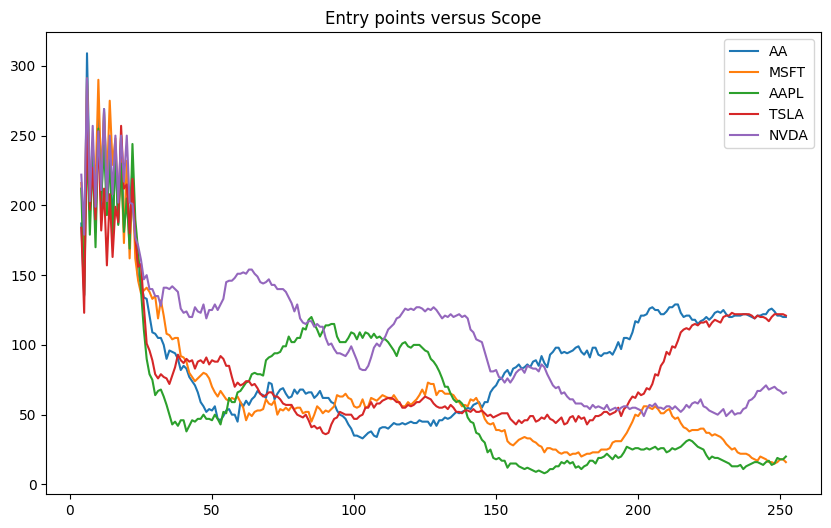

In [38]:
plt.figure(figsize=(10,6))
plt.title('Entry points versus Scope')
for key in dict_of_data:
    plt.plot(full_scope_list, dict_of_data[key], label = key)
plt.legend()

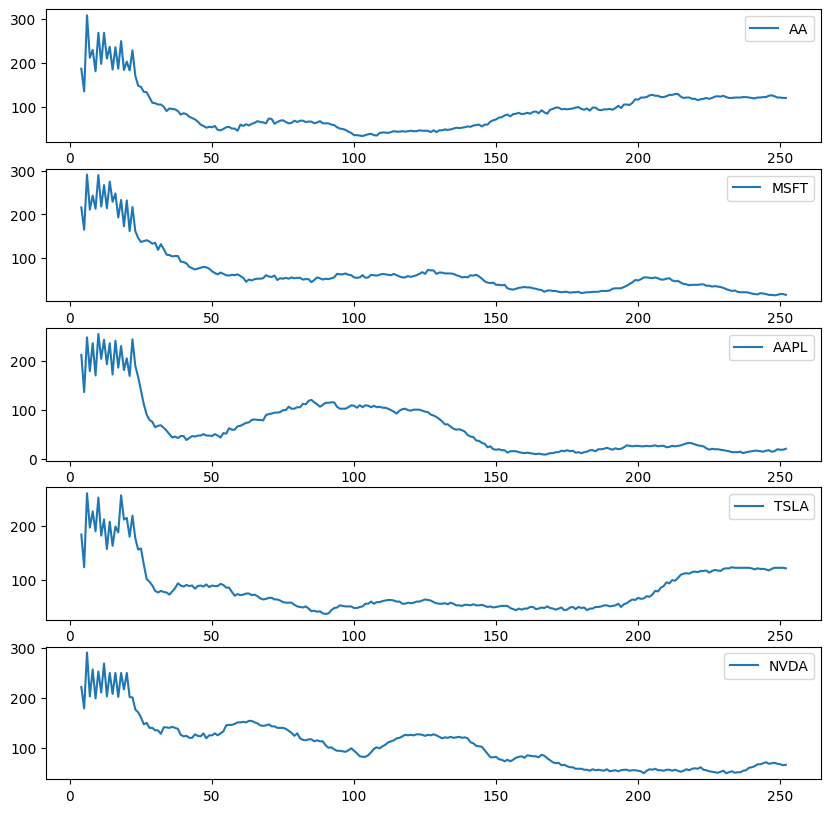

In [39]:
fig, axs = plt.subplots(len(dict_of_data), 1, figsize=(10, len(dict_of_data) * 2))
i = 0
for key in dict_of_data:
    axs[i].plot(full_scope_list, dict_of_data[key], label = key)
    axs[i].legend()
    i += 1